In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
import time
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow import keras as ks

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Raw Data

In [ ]:
train_images = train_images.reshape((train_images.shape[0], -1)) / 255.0
test_images = test_images.reshape((test_images.shape[0], -1)) / 255.0

In [ ]:
start_execution_mb_kmeans = time.time()
mini_batch_kmeans = MiniBatchKMeans(n_clusters=10, random_state=42, n_init=3)
mini_batch_kmeans.fit(train_images)
mini_batch_kmeans_labels = mini_batch_kmeans.predict(test_images)
end_execution_mb_kmeans = time.time()
exec_time_mb = end_execution_mb_kmeans - start_execution_mb_kmeans

calinski_harabasz_mini_batch_kmeans = calinski_harabasz_score(test_images, mini_batch_kmeans_labels)
davies_bouldin_mini_batch_kmeans = davies_bouldin_score(test_images, mini_batch_kmeans_labels)
silhouette_mini_batch_kmeans = silhouette_score(test_images, mini_batch_kmeans_labels)
num_clusters_mini_batch_kmeans = len(set(mini_batch_kmeans_labels))

start_execution_gmm = time.time()
gmm = GaussianMixture(n_components=10, random_state=42)
gmm.fit(train_images)
gmm_labels = gmm.predict(test_images)
end_execution_gmm = time.time()
exec_time_gmm = end_execution_gmm - start_execution_gmm

calinski_harabasz_gmm = calinski_harabasz_score(test_images, gmm_labels)
davies_bouldin_gmm = davies_bouldin_score(test_images, gmm_labels)
silhouette_gmm = silhouette_score(test_images, gmm_labels)
num_clusters_gmm = len(set(gmm_labels))

df = pd.DataFrame(columns=[
    'Dimensionality reduction technique name',
    'Clustering algorithm',
    'Training time for the dim. red. tech. in seconds',
    'Execution time for the clustering tech. in seconds',
    'Number of suggested clusters',
    'Calinski–Harabasz index',
    'Davies–Bouldin index',
    'Silhouette score'
])

raw_row_mb_kmeans = {
    'Dimensionality reduction technique name': 'Raw',
    'Clustering algorithm': 'Mini-Batch K-means',
    'Training time for the dim. red. tech. in seconds': 0,
    'Execution time for the clustering tech. in seconds': exec_time_mb,
    'Number of suggested clusters': num_clusters_mini_batch_kmeans,
    'Calinski–Harabasz index': calinski_harabasz_mini_batch_kmeans,
    'Davies–Bouldin index': davies_bouldin_mini_batch_kmeans,
    'Silhouette score': silhouette_mini_batch_kmeans
}
df.loc[len(df)] = raw_row_mb_kmeans

raw_row_gmm = {
    'Dimensionality reduction technique name': 'Raw',
    'Clustering algorithm': 'GMM',
    'Training time for the dim. red. tech. in seconds': 0,
    'Execution time for the clustering tech. in seconds': exec_time_gmm,
    'Number of suggested clusters': num_clusters_gmm,
    'Calinski–Harabasz index': calinski_harabasz_gmm,
    'Davies–Bouldin index': davies_bouldin_gmm,
    'Silhouette score': silhouette_gmm
}
df.loc[len(df)] = raw_row_gmm

print(df)

  Dimensionality reduction technique name Clustering algorithm  \
0                                     Raw   Mini-Batch K-means   
1                                     Raw                  GMM   

   Training time for the dim. red. tech. in seconds  \
0                                                 0   
1                                                 0   

   Execution time for the clustering tech. in seconds  \
0                                           2.516459    
1                                        2480.338189    

   Number of suggested clusters  Calinski–Harabasz index  \
0                            10              1219.951636   
1                            10               860.497633   

   Davies–Bouldin index  Silhouette score  
0              2.097009          0.134083  
1              2.161330          0.128307  


# PCA

In [ ]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [ ]:
print(f"Train images shape: {train_images.shape}")
print(f"Validation images shape: {val_images.shape}")
print(f"Test images shape: {test_images.shape}")

Train images shape: (48000, 784)
Validation images shape: (12000, 784)
Test images shape: (10000, 784)


In [ ]:
train_images_flat = train_images.reshape(train_images.shape[0], -1)
val_images_flat = val_images.reshape(val_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

In [ ]:
start_training_pca = time.time()
pca = PCA(n_components=50)
train_images_pca = pca.fit_transform(train_images_flat)
val_images_pca = pca.transform(val_images_flat)
test_images_pca = pca.transform(test_images_flat)
end_training_pca = time.time()

training_time = end_training_pca - start_training_pca
print(f"Training Time: {training_time} seconds")

Training Time: 5.5515663623809814 seconds


In [ ]:
print(f"Train images shape after PCA: {train_images_pca.shape}")
print(f"Validation images shape after PCA: {val_images_pca.shape}")
print(f"Test images shape after PCA: {test_images_pca.shape}")

Train images shape after PCA: (48000, 50)
Validation images shape after PCA: (12000, 50)
Test images shape after PCA: (10000, 50)


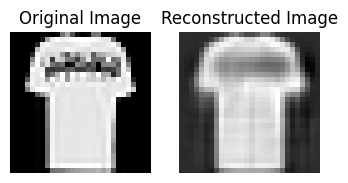

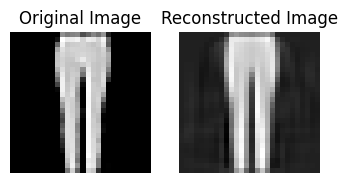

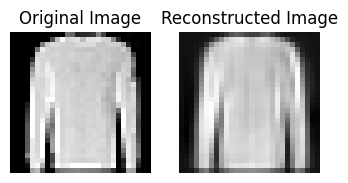

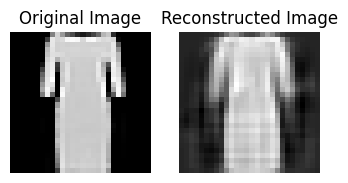

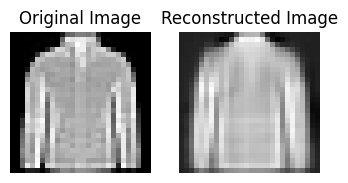

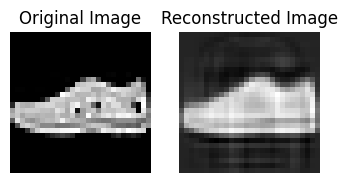

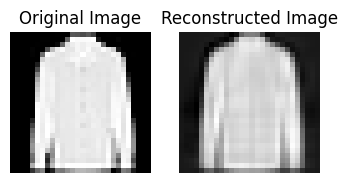

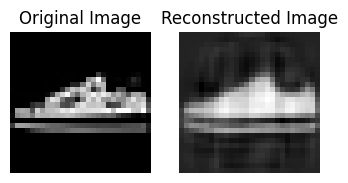

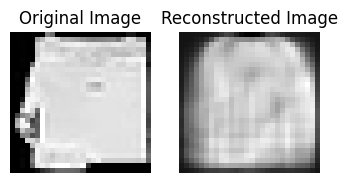

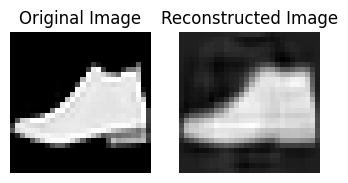

In [ ]:
num_classes = 10
samples_per_class = 1
selected_images = []
for i in range(num_classes):
    indices = np.where(train_labels == i)[0]
    selected_index = np.random.choice(indices, samples_per_class, replace=False)
    selected_images.extend(selected_index)

for index in selected_images:
    original_image = train_images[index].reshape(28, 28)
    if 'pca' in locals():
        reconstructed_image = pca.inverse_transform(train_images_pca[index]).reshape(28, 28)

    plt.figure(figsize=(4, 2))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    if 'pca' in locals():
        plt.subplot(1, 2, 2)
        plt.imshow(reconstructed_image, cmap='gray')
        plt.title("Reconstructed Image")
        plt.axis('off')

    plt.show()

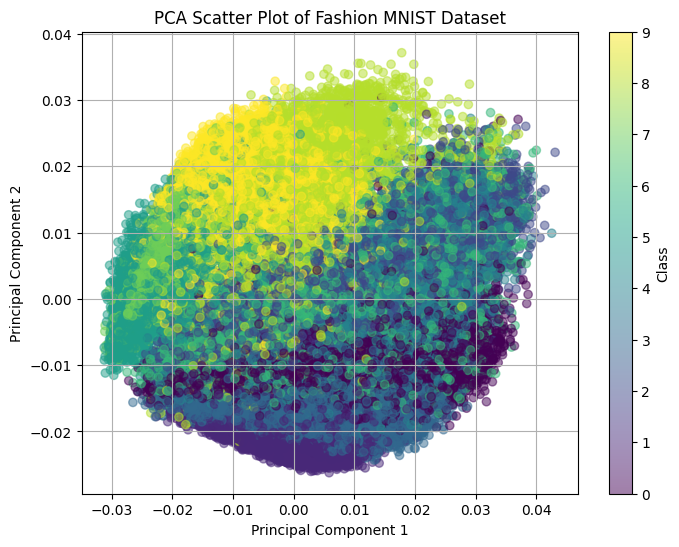

In [ ]:
pc1 = train_images_pca[:, 0]
pc2 = train_images_pca[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2, c=train_labels, cmap='viridis', alpha=0.5)
plt.title('PCA Scatter Plot of Fashion MNIST Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

In [ ]:
test_images_flat = test_images.reshape(test_images.shape[0], -1)
test_images_pca = pca.transform(test_images_flat)

print(f"Test images shape after PCA: {test_images_pca.shape}")

Test images shape after PCA: (10000, 50)


In [ ]:
start_execution_mb_kmeans = time.time()
mini_batch_kmeans = MiniBatchKMeans(n_clusters=10, random_state=42, n_init=3)

mini_batch_kmeans.fit(train_images_pca)

mini_batch_kmeans_labels = mini_batch_kmeans.predict(test_images_pca)
end_execution_mb_kmeans = time.time()

exec_time_mb = end_execution_mb_kmeans - start_execution_mb_kmeans
print(f"Execution Time for MiniBatch KMeans: {exec_time_mb} seconds")

print("Mini-Batch K-means Clustering Labels for Test Data:")
print(mini_batch_kmeans_labels)

Execution Time for MiniBatch KMeans: 0.4911026954650879 seconds
Mini-Batch K-means Clustering Labels for Test Data:
[6 0 1 ... 7 1 2]


In [ ]:
start_execution_gmm = time.time()
gmm = GaussianMixture(n_components=10, random_state=42)

gmm.fit(train_images_pca)

gmm_labels = gmm.predict(test_images_pca)
end_execution_gmm = time.time()

exec_time_gmm = end_execution_gmm - start_execution_gmm
print(f"Execution Time for GMM: {exec_time_gmm} seconds")

print("GMM Clustering Labels for Test Data:")
print(gmm_labels)

Execution Time for GMM: 36.34909534454346 seconds
GMM Clustering Labels for Test Data:
[3 1 4 ... 5 4 2]


In [ ]:
calinski_harabasz_mini_batch_kmeans = calinski_harabasz_score(test_images_pca, mini_batch_kmeans_labels)

davies_bouldin_mini_batch_kmeans = davies_bouldin_score(test_images_pca, mini_batch_kmeans_labels)

silhouette_mini_batch_kmeans = silhouette_score(test_images_pca, mini_batch_kmeans_labels)

num_clusters_mini_batch_kmeans = len(set(mini_batch_kmeans_labels))

In [ ]:
calinski_harabasz_gmm = calinski_harabasz_score(test_images_pca, gmm_labels)

davies_bouldin_gmm = davies_bouldin_score(test_images_pca, gmm_labels)

silhouette_gmm = silhouette_score(test_images_pca, gmm_labels)

num_clusters_gmm = len(set(gmm_labels))

In [ ]:
print("Mini-Batch K-means Metrics:")
print("Calinski-Harabasz index:", calinski_harabasz_mini_batch_kmeans)
print("Davies-Bouldin index:", davies_bouldin_mini_batch_kmeans)
print("Silhouette score:", silhouette_mini_batch_kmeans)
print("Number of Clusters:", num_clusters_mini_batch_kmeans)

print("GMM Metrics:")
print("Calinski-Harabasz index:", calinski_harabasz_gmm)
print("Davies-Bouldin index:", davies_bouldin_gmm)
print("Silhouette score:", silhouette_gmm)
print("Number of Clusters:", num_clusters_gmm)

Mini-Batch K-means Metrics:
Calinski-Harabasz index: 1747.6375592968984
Davies-Bouldin index: 1.6541098672193546
Silhouette score: 0.18525741814731997
Number of Clusters: 10
GMM Metrics:
Calinski-Harabasz index: 1123.8052218097603
Davies-Bouldin index: 2.444763496946857
Silhouette score: 0.15645212867645011
Number of Clusters: 10


In [ ]:
pca_gmm_row = {
    'Dimensionality reduction technique name': 'PCA',
    'Clustering algorithm': 'Gaussian Mixture',
    'Training time for the dim. red. tech. in seconds': training_time,
    'Execution time for the clustering tech. in seconds': exec_time_gmm,
    'Number of suggested clusters': num_clusters_gmm,
    'Calinski–Harabasz index': calinski_harabasz_gmm,
    'Davies–Bouldin index': silhouette_gmm,
    'Silhouette score': silhouette_gmm
}

pca_mb_row = {
    'Dimensionality reduction technique name': 'PCA',
    'Clustering algorithm': 'Mini-Batch K-means',
    'Training time for the dim. red. tech. in seconds': training_time,
    'Execution time for the clustering tech. in seconds': exec_time_mb,
    'Number of suggested clusters': num_clusters_mini_batch_kmeans,
    'Calinski–Harabasz index': calinski_harabasz_mini_batch_kmeans,
    'Davies–Bouldin index': silhouette_mini_batch_kmeans,
    'Silhouette score': silhouette_mini_batch_kmeans
}

df.loc[len(df)] = pca_mb_row
df.loc[len(df)] = pca_gmm_row
print(df)

  Dimensionality reduction technique name Clustering algorithm  \
0                                     Raw   Mini-Batch K-means   
1                                     Raw                  GMM   
2                                     PCA   Mini-Batch K-means   
3                                     PCA     Gaussian Mixture   

   Training time for the dim. red. tech. in seconds  \
0                                          0.000000   
1                                          0.000000   
2                                          5.551566   
3                                          5.551566   

   Execution time for the clustering tech. in seconds  \
0                                           2.516459    
1                                        2480.338189    
2                                           0.491103    
3                                          36.349095    

   Number of suggested clusters  Calinski–Harabasz index  \
0                            10              12

# SAE

In [ ]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [ ]:
print(f"Train images shape: {train_images.shape}")
print(f"Validation images shape: {val_images.shape}")
print(f"Test images shape: {test_images.shape}")

Train images shape: (48000, 784)
Validation images shape: (12000, 784)
Test images shape: (10000, 784)


In [ ]:
def the_autoencoder():
  input_img = ks.Input(shape=(784,))
  encoded = ks.layers.Dense(128, activation='relu')(input_img)
  encoded = ks.layers.Dense(64, activation='relu')(encoded)
  encoded = ks.layers.Dense(32, activation='relu')(encoded)

  decoded = ks.layers.Dense(64, activation='relu')(encoded)
  decoded = ks.layers.Dense(128, activation='relu')(decoded)
  decoded = ks.layers.Dense(784, activation='sigmoid')(decoded)

  SAE = ks.Model(input_img, decoded)
  return SAE

In [ ]:
#build the SAE model
SAE = the_autoencoder()
SAE.summary()
SAE.compile(optimizer='adam', loss='binary_crossentropy')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136

In [ ]:
#train the model
# use a per-pixel binary crossentropy loss, and the Adam optimizer
history = SAE.fit(train_images.reshape(-1,(28*28)),
        train_images.reshape(-1,(28*28)),
        epochs=10,
        batch_size=128,
        shuffle=True,
        validation_data=(val_images.reshape(-1,(28*28)), val_images.reshape(-1,(28*28))))

Epoch 1/10
375/375 [==============================] - 7s 16ms/step - loss: 0.3600 - val_loss: 0.3120
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 0.3065 - val_loss: 0.3045
Epoch 3/10
375/375 [==============================] - 7s 19ms/step - loss: 0.2988 - val_loss: 0.2967
Epoch 4/10
375/375 [==============================] - 8s 21ms/step - loss: 0.2945 - val_loss: 0.2930
Epoch 5/10
375/375 [==============================] - 9s 25ms/step - loss: 0.2919 - val_loss: 0.2924
Epoch 6/10
375/375 [==============================] - 6s 16ms/step - loss: 0.2895 - val_loss: 0.2890
Epoch 7/10
375/375 [==============================] - 6s 15ms/step - loss: 0.2878 - val_loss: 0.2874
Epoch 8/10
375/375 [==============================] - 7s 18ms/step - loss: 0.2863 - val_loss: 0.2858
Epoch 9/10
375/375 [==============================] - 9s 24ms/step - loss: 0.2850 - val_loss: 0.2846
Epoch 10/10
375/375 [==============================] - 8s 22ms/step - loss: 0.2841 - val_lo

In [ ]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

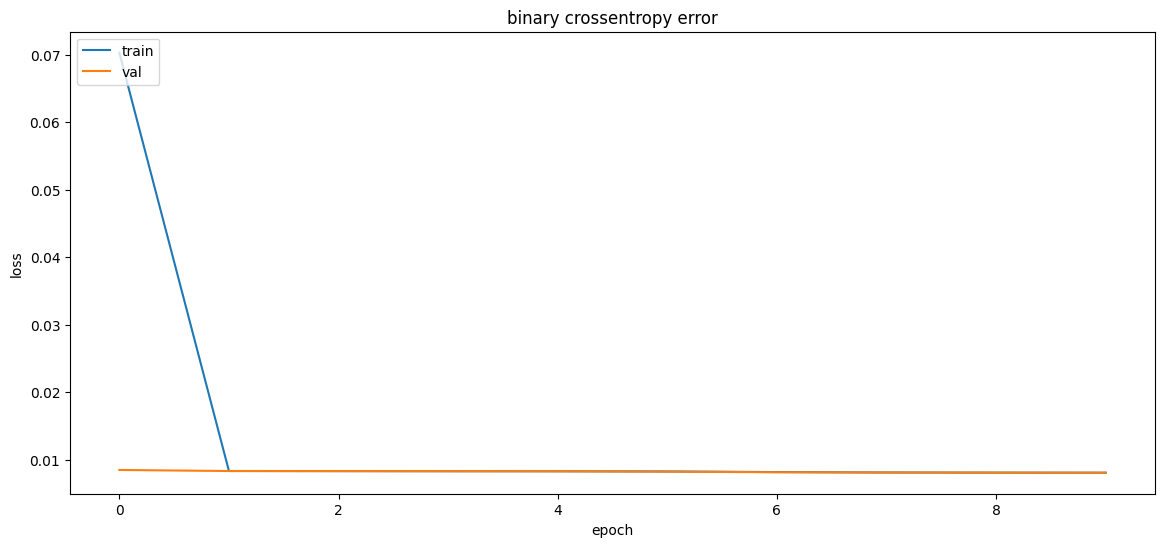

In [ ]:
#plot the history performance scores
plt.figure(figsize=(14,6))
plt.plot(history.history[list(history.history.keys())[0]])
plt.plot(history.history[list(history.history.keys())[1]])
plt.title('binary crossentropy error')
plt.ylabel(list(history.history.keys())[0])
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Encode and decode some digits throught our SAE
# Note that we take them from the *test* set
restored_testing_dataset = SAE.predict(test_images.reshape(-1,(28*28)))

313/313 [==============================] - 1s 3ms/step


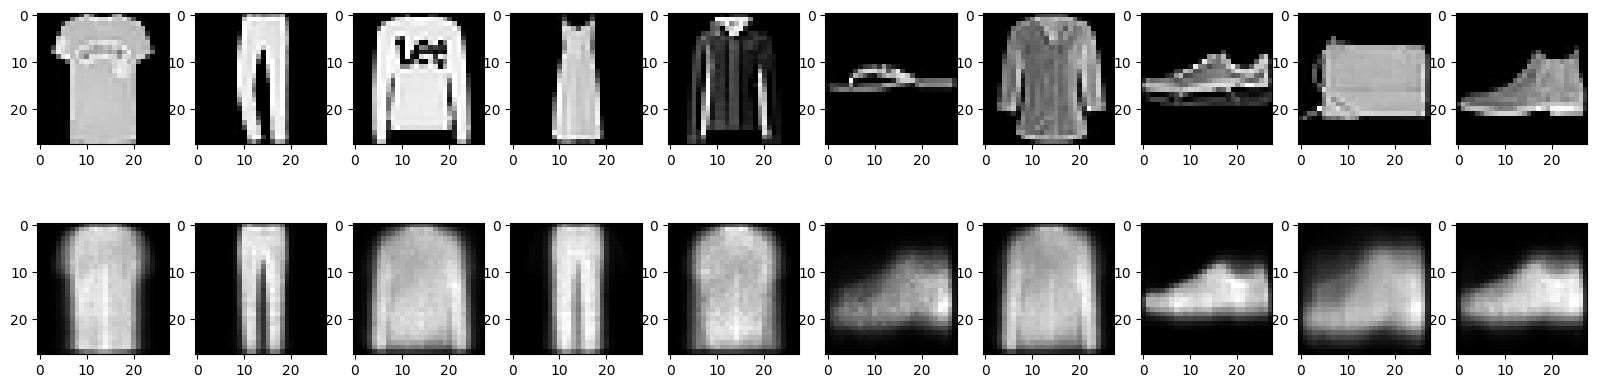

In [ ]:
plt.figure(figsize=(20,5))
for i in range(10):
    index = test_labels.tolist().index(i)
    plt.subplot(2, 10, i+1)
    plt.imshow(test_images[index].reshape((28,28)))
    plt.gray()
    plt.subplot(2, 10, i+11)
    plt.imshow(restored_testing_dataset[index].reshape((28,28)))
    plt.gray()

1500/1500 [==============================] - 9s 6ms/step


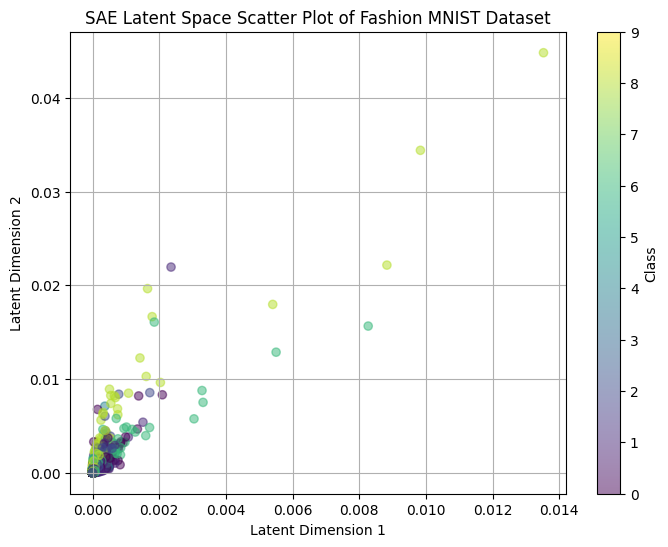

In [ ]:
# Encode the training images using the encoder part of the autoencoder
latent_representations = SAE.predict(train_images.reshape(-1, (28*28)))

# Plot the latent space
plt.figure(figsize=(8, 6))
plt.scatter(latent_representations[:, 0], latent_representations[:, 1], c=train_labels, cmap='viridis', alpha=0.5)
plt.title('SAE Latent Space Scatter Plot of Fashion MNIST Dataset')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

In [ ]:
# Encode the training and test images using the encoder part of the autoencoder
train_images_latent = SAE.predict(train_images.reshape(-1, (28*28)))
test_images_latent = SAE.predict(test_images.reshape(-1, (28*28)))

print(f"Train images shape after SAE: {train_images_latent.shape}")
print(f"Test images shape after SAE: {test_images_latent.shape}")

# Clustering with Mini-Batch K-means
start_execution_mb_kmeans = time.time()
mini_batch_kmeans = MiniBatchKMeans(n_clusters=10, random_state=42, n_init=3)
mini_batch_kmeans.fit(train_images_latent)
mini_batch_kmeans_labels = mini_batch_kmeans.predict(test_images_latent)
end_execution_mb_kmeans = time.time()
exec_time_mb = end_execution_mb_kmeans - start_execution_mb_kmeans
print(f"Execution Time for MiniBatch KMeans: {exec_time_mb} seconds")

# Clustering with GMM
start_execution_gmm = time.time()
gmm = GaussianMixture(n_components=10, random_state=42)
gmm.fit(train_images_latent)
gmm_labels = gmm.predict(test_images_latent)
end_execution_gmm = time.time()
exec_time_gmm = end_execution_gmm - start_execution_gmm
print(f"Execution Time for GMM: {exec_time_gmm} seconds")

# Calculate clustering performance metrics
calinski_harabasz_mini_batch_kmeans = calinski_harabasz_score(test_images_latent, mini_batch_kmeans_labels)
davies_bouldin_mini_batch_kmeans = davies_bouldin_score(test_images_latent, mini_batch_kmeans_labels)
silhouette_mini_batch_kmeans = silhouette_score(test_images_latent, mini_batch_kmeans_labels)
num_clusters_mini_batch_kmeans = len(set(mini_batch_kmeans_labels))

calinski_harabasz_gmm = calinski_harabasz_score(test_images_latent, gmm_labels)
davies_bouldin_gmm = davies_bouldin_score(test_images_latent, gmm_labels)
silhouette_gmm = silhouette_score(test_images_latent, gmm_labels)
num_clusters_gmm = len(set(gmm_labels))

# Print clustering metrics
print("Mini-Batch K-means Metrics:")
print("Calinski-Harabasz index:", calinski_harabasz_mini_batch_kmeans)
print("Davies-Bouldin index:", davies_bouldin_mini_batch_kmeans)
print("Silhouette score:", silhouette_mini_batch_kmeans)
print("Number of Clusters:", num_clusters_mini_batch_kmeans)

print("GMM Metrics:")
print("Calinski-Harabasz index:", calinski_harabasz_gmm)
print("Davies-Bouldin index:", davies_bouldin_gmm)
print("Silhouette score:", silhouette_gmm)
print("Number of Clusters:", num_clusters_gmm)

313/313 [==============================] - 3s 9ms/step
Train images shape after SAE: (48000, 784)
Test images shape after SAE: (10000, 784)
Execution Time for MiniBatch KMeans: 1.5242559909820557 seconds
Execution Time for GMM: 1244.2083127498627 seconds
Mini-Batch K-means Metrics:
Calinski-Harabasz index: 1949.9913539325635
Davies-Bouldin index: 1.5685067850836838
Silhouette score: 0.20085247
Number of Clusters: 10
GMM Metrics:
Calinski-Harabasz index: 1371.6807888816625
Davies-Bouldin index: 1.774846013286247
Silhouette score: 0.1286135
Number of Clusters: 10


In [ ]:
# Assuming `training_time` is the time taken to train the SAE model
training_time = history.history['loss']

# Create a dataframe to store results
df = pd.DataFrame(columns=[
    'Dimensionality reduction technique name',
    'Clustering algorithm',
    'Training time for the dim. red. tech. in seconds',
    'Execution time for the clustering tech. in seconds',
    'Number of suggested clusters',
    'Calinski–Harabasz index',
    'Davies–Bouldin index',
    'Silhouette score'
])

# Store results for Mini-Batch K-means
sae_mb_row = {
    'Dimensionality reduction technique name': 'SAE',
    'Clustering algorithm': 'Mini-Batch K-means',
    'Training time for the dim. red. tech. in seconds': sum(training_time),
    'Execution time for the clustering tech. in seconds': exec_time_mb,
    'Number of suggested clusters': num_clusters_mini_batch_kmeans,
    'Calinski–Harabasz index': calinski_harabasz_mini_batch_kmeans,
    'Davies–Bouldin index': davies_bouldin_mini_batch_kmeans,
    'Silhouette score': silhouette_mini_batch_kmeans
}

# Store results for GMM
sae_gmm_row = {
    'Dimensionality reduction technique name': 'SAE',
    'Clustering algorithm': 'Gaussian Mixture',
    'Training time for the dim. red. tech. in seconds': sum(training_time),
    'Execution time for the clustering tech. in seconds': exec_time_gmm,
    'Number of suggested clusters': num_clusters_gmm,
    'Calinski–Harabasz index': calinski_harabasz_gmm,
    'Davies–Bouldin index': davies_bouldin_gmm,
    'Silhouette score': silhouette_gmm
}

# Append results to dataframe
df = pd.concat([df, pd.DataFrame([sae_mb_row])], ignore_index=True)
df = pd.concat([df, pd.DataFrame([sae_gmm_row])], ignore_index=True)

print(df)

  Dimensionality reduction technique name Clustering algorithm  \
0                                     SAE   Mini-Batch K-means   
1                                     SAE     Gaussian Mixture   

   Training time for the dim. red. tech. in seconds  \
0                                          2.984383   
1                                          2.984383   

   Execution time for the clustering tech. in seconds  \
0                                           1.524256    
1                                        1244.208313    

  Number of suggested clusters  Calinski–Harabasz index  Davies–Bouldin index  \
0                           10              1949.991354              1.568507   
1                           10              1371.680789              1.774846   

   Silhouette score  
0          0.200852  
1          0.128614  
